# Plotting

In this unit, we take a first look at plotting numerical
data. Python itself does not have any built-in
plotting capabilities, so we will be using *matplotlib (MPL)*,
the most popular graphics library for Python.

-   For details on a particular plotting function, see the
    [official documentation](https://matplotlib.org/contents.html).
-   There is an official introductory [tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
    which you can use along-side this unit.

When using matplotlib in interactive Jupyter notebooks (such as this one),
we can enable a more fancy plotting backend that allows us to dynamically
adjust the zoom, etc.
This is done by adding the line
```
%matplotlib widget
```
For this to work, the `ipympl` package needs to be installed,
see [here](https://github.com/matplotlib/ipympl) for details.
Note that this is not supported or required (and in fact produces a syntax error)
in regular `*.py` Python script files.

In order to access the functions and objects from matplotlib, we
first need to import them. The general convention is to use the
namespace `plt` for this purpose:

In [1]:
import matplotlib.pyplot as plt

***
## Line and scatter plots

One of the simplest plots we can generate is a line
described by a list of points.

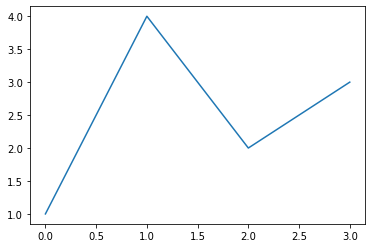

In [2]:
# import matplotlib library
import matplotlib.pyplot as plt

# Plot list of integers
yvalues = [1, 4, 2, 3]
plt.plot(yvalues)

We didn't even have to specify the corresponding $x$-values,
as MPL automatically assumes them to be [0, 1, 2, ...].
Usually, we want to plot for a given set of $x$-values like this:

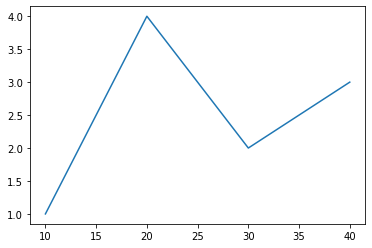

In [3]:
# explicitly specify x-values
xvalues = [10, 20, 30, 40]
plt.plot(xvalues, yvalues)

Similar to Matlab, we can also specify multiple lines to be plotting
in a single graph:

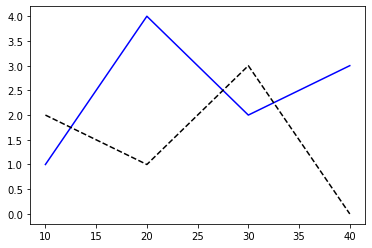

In [4]:
yvalues2 = [2.0, 1.0, 3.0, 0.0]
plt.plot(xvalues, yvalues, 'b-', xvalues, yvalues2, 'k--')

The characters following each set of $y$-values are style specifications
that are very similar to the ones used in Matlab.
More specifically, the letters are short-hand notations for colours:

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The remaining characters set the line styles. Valid values are

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

It is possible to use any RGB colour or one of the many
predefined named colors such as `'red'` or `'blue'` (see [here](https://matplotlib.org/tutorials/colors/colors.html) for details).
Additionally, we can define line styles with custom spacings
between dashes.

We use the `scatter()` function to create scatter plots in a similar fashion:

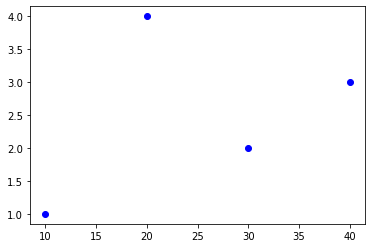

In [5]:
plt.scatter(xvalues, yvalues, color='blue')

***
## Plotting categorical data

Instead of numerical values on the x-axis, we can also plot categorical
variables by passing them directly to the plotting function.

For example, assume we have three categorical "groups" and each has an associated
numerical value:

Text(0.5, 1.0, 'Population')

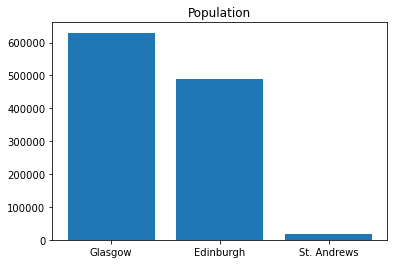

In [6]:
import matplotlib.pyplot as plt

cities = ['Glasgow', 'Edinburgh', 'St. Andrews']
population = [630000, 488000,  16800]
plt.bar(cities, population)
plt.title('Population')

***
## Adding labels and annotations

Matplotlib has numerous functions to add labels and annotations:

-   Use `title()` and `suptitle()` to add titles to your graphs.
    The latter adds a title for the whole figure, which might
    span multiple plots (axes).
-   We can add axis labels by calling `xlabel()` and `ylabel()`.
-   To add a legend, call `legend()`, which in its most simple
    form takes a list of labels which are in the same order
    as the plotted data.
    [[documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)]
-   Use `text()` to add additional text at arbitrary locations.
    [[documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html)]
-   Use `annotate()` to display text next to some data point;
    it's easier to position correctly than `text()` and you
    can add arrows!
    [[documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html)]

Text(20, -20, 'Point 2')

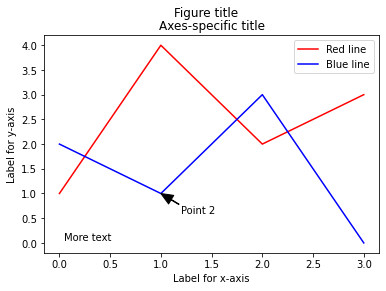

In [7]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, 'r', xvalues, yvalues2, 'b')
plt.suptitle('Figure title')
plt.title('Axes-specific title')
plt.xlabel('Label for x-axis')
plt.ylabel('Label for y-axis')
plt.legend(['Red line', 'Blue line'])

# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, 'More text')

# Annotate second point
plt.annotate('Point 2', (xvalues[1], yvalues2[1]), (20, -20),
             textcoords='offset points',
             arrowprops={'facecolor': 'black', 'width': 0.5,
                         'headwidth': 10.0})

***
## Plot limits, ticks and tick labels

We adjust the plot limits, ticks and tick labels as follows:

-   Plotting limits are set using the `xlim()` and `ylim()` functions.
    Each accepts a tuple `(min,max)` to set the desired range.
-   Ticks and tick labels can be set by calling `xticks()` or `yticks()`.


(-1.1, 1.1)

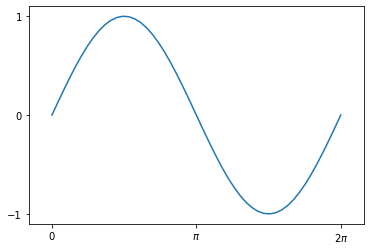

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(0.0, 2*np.pi, 50)
plt.plot(xvalues, np.sin(xvalues))

# Set major ticks for x and y axes, and xtick labels.
# We can use LaTeX code in labels!
plt.xticks([0.0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$'])
plt.yticks([-1.0, 0.0, 1.0])

# Adjust plot limits in x and y direction
plt.xlim((-0.5, 2*np.pi + 0.5))
plt.ylim((-1.1, 1.1))


***
## Object-oriented interface

So far, we have only used the so-called `pyplot` interface which involves
calling *global* plotting functions from the `plt` module.
This interface is intended to be similar to Matlab, but is also somewhat
limited and less clean.

We can instead use the object-oriented interface
(called this way because we call methods of the `Figure` and `Axes` objects).
While there is not much point in using the object-oriented interface
in a Jupyter notebook, it should be the preferred method when
writing re-usable code in Python files.

To use the object-oriented interface, we need to get figure and
axes objects. The easiest way to accomplish this is using
the `subplots()` function, like this:
```
fig, ax = plt.subplots()
```
As an example, we recreate the graph from the section on
labels and annotations using the object-oriented interface:

Text(20, -20, 'Point 2')

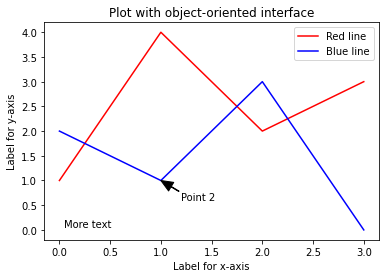

In [9]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

fig, ax = plt.subplots()
ax.plot(xvalues, yvalues, color='red', label='Red line')
ax.plot(xvalues, yvalues2, color='blue', label='Blue line')
ax.set_xlabel('Label for x-axis')
ax.set_ylabel('Label for y-axis')
ax.legend()
ax.set_title('Plot with object-oriented interface')
ax.text(0.05, 0.05, 'More text')

# Annotate second point
plt.annotate('Point 2', (xvalues[1], yvalues2[1]), (20, -20),
             textcoords='offset points',
             arrowprops={'facecolor': 'black', 'width': 0.5,
                         'headwidth': 10.0})


The code is quite similar, except that attributes are set using
the `set_xxx()` methods of the `ax` object. For example,
instead of calling `xlim()`, we use `ax.set_xlim()`.

The above example also illustrates how we can
specify plot properties such as styles and legend labels
explicitly as keyword arguments when calling `plot()`:
```
ax.plot(xvalues, yvalues, property1=value1, property2=value2, ...)
```

***
## Working with multiple plots (axes)

The object-oriented interface becomes particularly useful
if we want to create multiple axes (or figures). This is possible
to achieve with the `pyplot` programming model as well, but
somewhat more obscure.

For example, to create a row with two plots, we use:

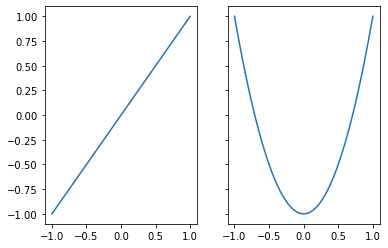

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
xvalues = np.linspace(-1.0, 1.0, 50)
ax[0].plot(xvalues, xvalues)
ax[1].plot(xvalues, 2*xvalues**2.0 - 1)

With multiple axes, the second object returned by `subplots()`
is actually a NumPy array with a shape
that corresponds to the number of plots.
If we request a $2\times2$
plot, `ax[0,0]` will be the top-left axes object,
`ax[0,1]` the top-right one, and so on.

The next example illustrates how to create a figure with four panels:

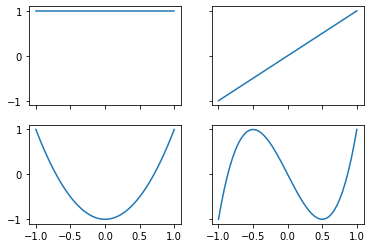

In [11]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot the first four Chebyshev polynomials on the interval [-1,1]
for i in range(2):
    for j in range(2):
        yvalues = np.cos((j + i*2) * np.arccos(xvalues))
        ax[i,j].plot(xvalues, yvalues)

Note the use of `sharex=True` and `sharey=True`. This tells
matplotlib that all axes share the same plot limits, so the
tick labels can be omitted in the figure's interior to
preserve space.

***
# Exercises

## Exercise 1: Trigonometric functions

Plot the functions $\sin(x)$ and $\cos(x)$ on the interval
$[-\pi, \pi]$, each in a separate graph.
Include a legend for each plot, and add pretty tick
labels at $[-\pi, 0, \pi]$ which use the $\LaTeX$ symbol for $\pi$.
Add an overall title "Trigonometric functions".

*Hint:* NumPy defines the functions `np.sin()` and `np.cos()` as well
as the value `np.pi`.


## Exercise 2: Logarithmic scaling

In economics and finance, we often plot using the $\log_{10}$ scale
if the plotted data is of very different orders of magnitude.

Create a figure with two sub-plots, each plotting the
function $f(x) = 10^x$ on a uniformly-spaced interval
$[-5,5]$ with 100 points.
Use the (default) linear scale in the first plot, but
apply the $\log_{10}$ scale in the second.

*Hint:* You can set the axis scale to log by calling
`yscale('log')`, or `set_yscale('log')` when using
the object-oriented interface.

***
# Solutions

## Solution for exercise 1

Text(0.5, 0.98, 'Trigonometric functions')

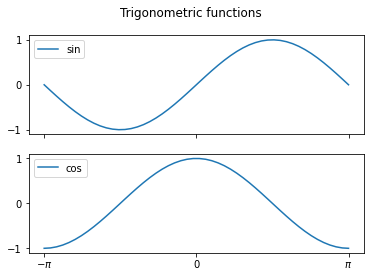

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-np.pi, np.pi, 50)
# Create figure with two rows, one column
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True)

xticks = [-np.pi, 0.0, np.pi]
xticklabels = [r'$-\pi$', '0', r'$\pi$']
yticks = [-1.0, 0.0, 1.0]

# Create sin() plot using first axes object
ax[0].plot(xvalues, np.sin(xvalues), label='sin')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticklabels)
ax[0].set_yticks(yticks)
ax[0].legend(loc='upper left')

# Create cos() plot using second axes object
ax[1].plot(xvalues, np.cos(xvalues), label='cos')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticklabels)
ax[1].set_yticks(yticks)
ax[1].legend(loc='upper left')

# Add overall figure title (this is not axes-specific)
fig.suptitle('Trigonometric functions')

## Solution for exercise 2

Text(0.5, 1.0, 'Log scale')

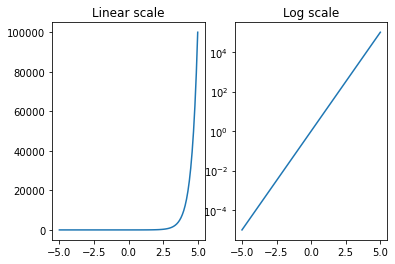

In [13]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-5.0, 5.0, 100)
fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].plot(xvalues, 10.0**xvalues)
ax[0].set_title('Linear scale')

ax[1].plot(xvalues, 10.0**xvalues)
# Set y-axis to log scale (assumes base-10 log)
ax[1].set_yscale('log')
ax[1].set_title('Log scale')